<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day

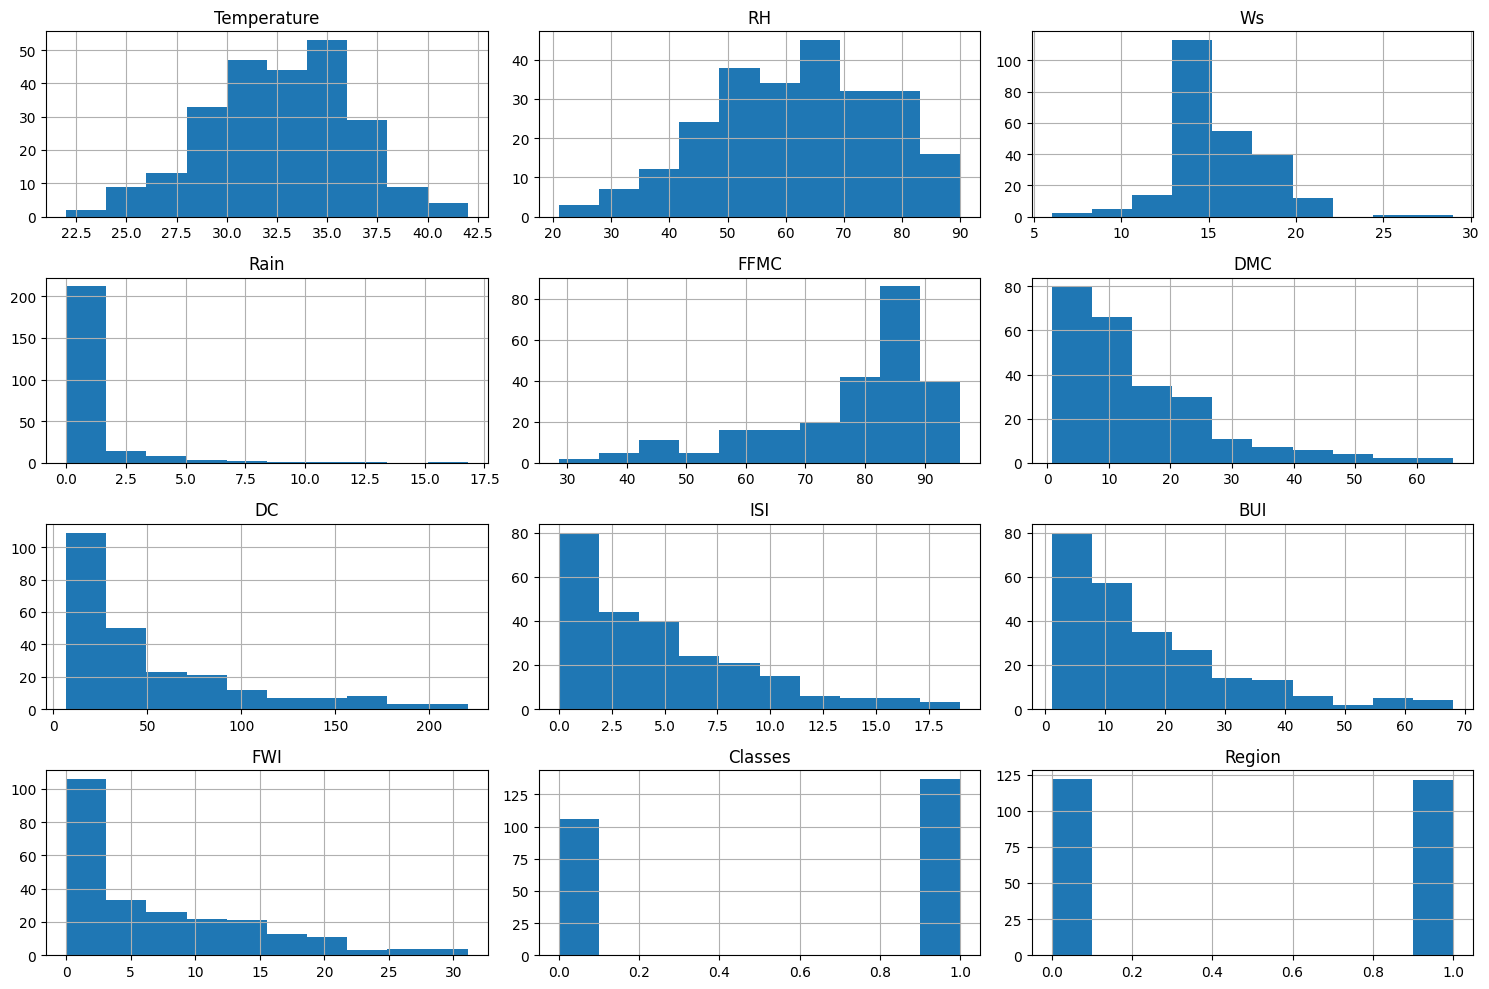

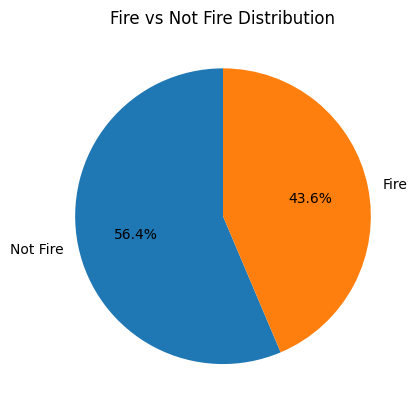

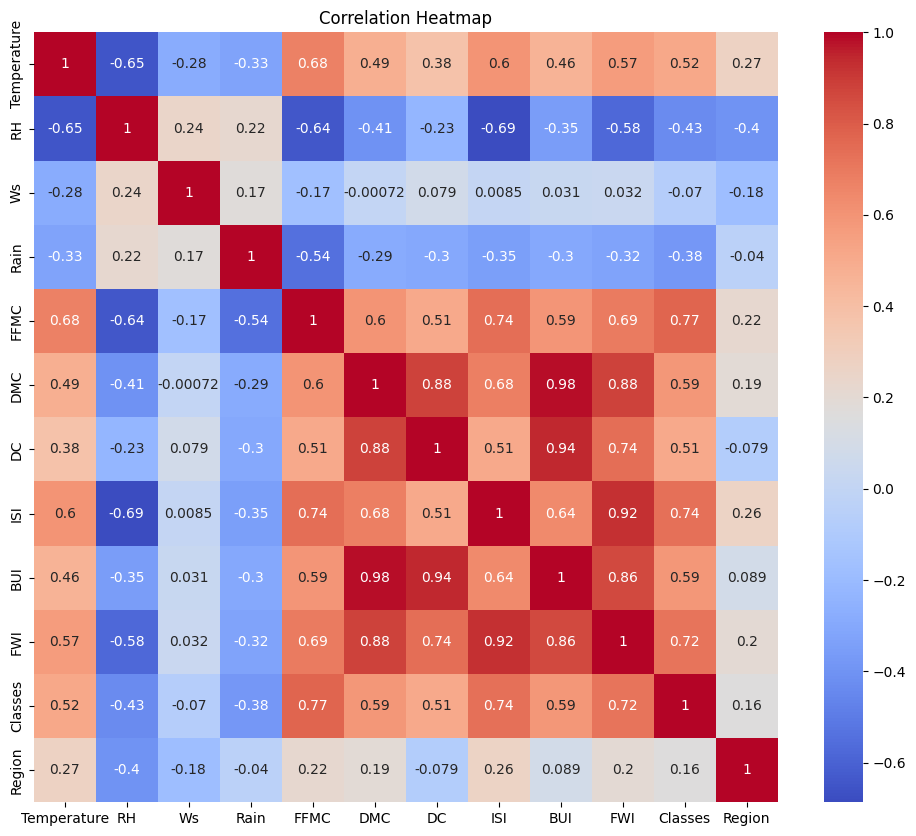

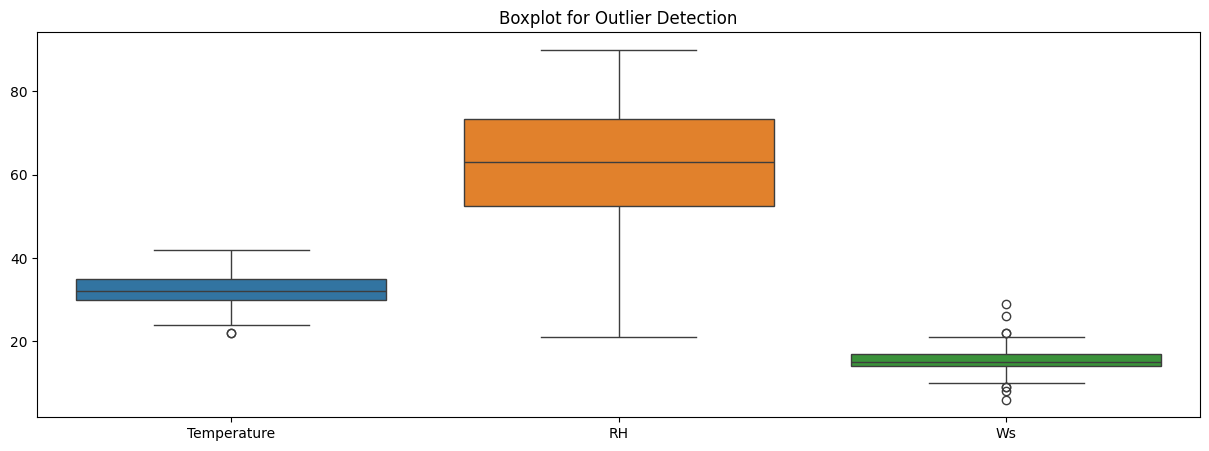

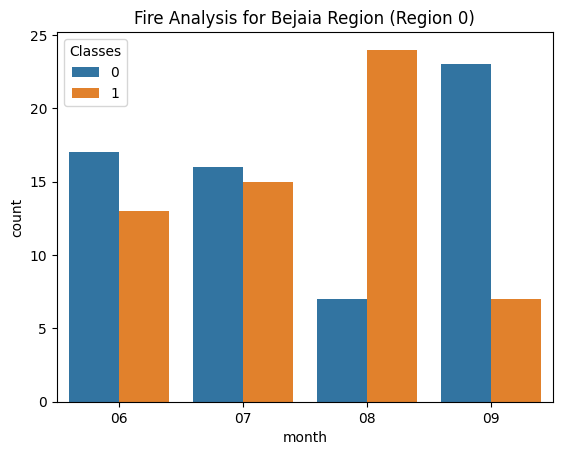

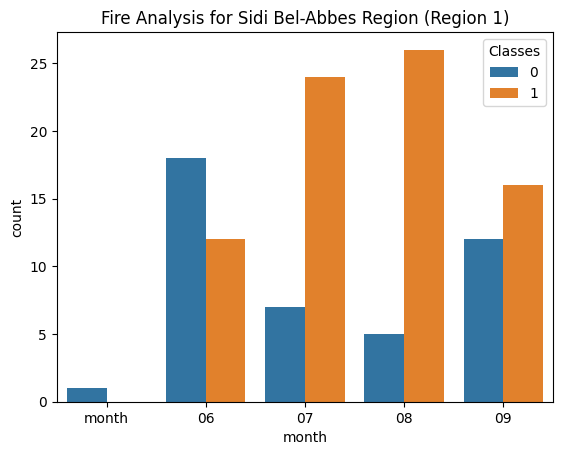

In [ ]:
#📌 Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# 📘 Explanation:
#•	We import essential Python libraries for data analysis and visualization.

# 📌 Step 2: Read the Dataset
df =pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

# | Day | Month | Year | Temperature (°C) | RH (%) | Ws (km/h) | Rain (mm) | FFMC | DMC | DC  | ISI | BUI | FWI | Classes  |
# | --- | ----- | ---- | ---------------- | ------ | --------- | --------- | ---- | --- | --- | --- | --- | --- | -------- |
# | 01  | 06    | 2012 | 29               | 57     | 18        | 0.0       | 65.7 | 3.4 | 7.6 | 1.3 | 3.4 | 0.5 | not fire |
# | 02  | 06    | 2012 | 29               | 61     | 13        | 1.3       | 64.4 | 4.1 | 7.6 | 1.0 | 3.9 | 0.4 | not fire |
# | 03  | 06    | 2012 | 26               | 82     | 22        | 13.1      | 47.1 | 2.5 | 7.1 | 0.3 | 2.7 | 0.1 | not fire |
# | 04  | 06    | 2012 | 25               | 89     | 13        | 2.5       | 28.6 | 1.3 | 6.9 | 0.0 | 1.7 | 0.0 | not fire |

# 📘 Explanation:
# •	Load the dataset using pandas.
# •	Check the first few rows of the dataset.
# header=1 Your dataset likely has a title row like "Bejaia Region Dataset" on row=0 which is not part
#  of column name
# Going to create regression model that predict Temperature 

#📌 Step 3: Check Data Types and Info
df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 246 entries, 0 to 245
# Data columns (total 14 columns):
#  #   Column       Non-Null Count  Dtype 
# ---  ------       --------------  ----- 
#  0   day          246 non-null    object
#  1   month        245 non-null    object
#  2   year         245 non-null    object
#  3   Temperature  245 non-null    object
#  4    RH          245 non-null    object
#  5    Ws          245 non-null    object
#  6   Rain         245 non-null    object
#  7   FFMC         245 non-null    object
#  8   DMC          245 non-null    object
#  9   DC           245 non-null    object
#  10  ISI          245 non-null    object
#  11  BUI          245 non-null    object
#  12  FWI          245 non-null    object
#  13  Classes      244 non-null    object
# dtypes: object(14)
# memory usage: 27.0+ KB

# 📌 Step 4: Check for Missing Values
df[df.isnull().any(axis=1)]
# | Index | Day                               | Month | Year | Temp | RH  | Ws  | Rain | FFMC | DMC  | DC         | ISI  | BUI  | FWI | Classes |
# | ----- | --------------------------------- | ----- | ---- | ---- | --- | --- | ---- | ---- | ---- | ---------- | ---- | ---- | --- | ------- |
# | 122   | **Sidi-Bel Abbes Region Dataset** | NaN   | NaN  | NaN  | NaN | NaN | NaN  | NaN  | NaN  | NaN        | NaN  | NaN  | NaN | NaN     |
# | 167   | 14                                | 07    | 2012 | 37   | 37  | 18  | 0.2  | 88.9 | 12.9 | **14.6 9** | 12.5 | 10.4 | NaN | fire    |


# 📘 Explanation:
# •	We identify 2 rows with NaN (missing) values.
# •	These rows will be removed in the next step.
# We also know that 1 to 122 region belong "Bejaia Region Dataset" and 122 t0 249 "Sidi-Bel Abbes Region Dataset"

# 📌 Step 5: Add Region Column (0 for Bejaia, 1 for Sidi Bel-Abbes)
df.loc[:122 , "Region"] = 0
df.loc[122: , "Region"] = 1
# •	Based on the row index, add a Region column.
# •	Helps to distinguish between the two regions in Algeria.

df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 246 entries, 0 to 245
# Data columns (total 15 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   day          246 non-null    object 
#  1   month        245 non-null    object 
#  2   year         245 non-null    object 
#  3   Temperature  245 non-null    object 
#  4    RH          245 non-null    object 
#  5    Ws          245 non-null    object 
#  6   Rain         245 non-null    object 
#  7   FFMC         245 non-null    object 
#  8   DMC          245 non-null    object 
#  9   DC           245 non-null    object 
#  10  ISI          245 non-null    object 
#  11  BUI          245 non-null    object 
#  12  FWI          245 non-null    object 
#  13  Classes      244 non-null    object 
#  14  Region       246 non-null    float64
# dtypes: float64(1), object(14)
# memory usage: 29.0 KB

# 📌 Step 6: Convert Region to Integer Type
df['Region'] = df['Region'].astype(int)
# •	Make sure the new Region column is an integer.
df.head()
# | Index | Day | Month | Year | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | ----- | --- | ----- | ---- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 01  | 06    | 2012 | 29          | 57 | 18 | 0    | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 02  | 06    | 2012 | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 03  | 06    | 2012 | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 04  | 06    | 2012 | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 05  | 06    | 2012 | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

df.isnull().sum()
# day            0
# month          1
# year           1
# Temperature    1
#  RH            1
#  Ws            1
# Rain           1
# FFMC           1
# DMC            1
# DC             1
# ISI            1
# BUI            1
# FWI            1
# Classes        2
# Region         0
# dtype: int64

#Yes there ar some null value

# 📌 Step 7: Remove Rows with Null Values & Reset Index
df = df.dropna().reset_index(drop=True)
df.head()
# | Index | Day | Month | Year | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | ----- | --- | ----- | ---- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 01  | 06    | 2012 | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 02  | 06    | 2012 | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 03  | 06    | 2012 | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 04  | 06    | 2012 | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 05  | 06    | 2012 | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

df.isnull().sum()
# day            0
# month          0
# year           0
# Temperature    0
#  RH            0
#  Ws            0
# Rain           0
# FFMC           0
# DMC            0
# DC             0
# ISI            0
# BUI            0
# FWI            0
# Classes        0
# Region         0
# dtype: int64

# Strip column names
clean_columns = [col.strip().lower() for col in df.columns]

def is_bad_row(row):
    return sum(str(row[col]).strip().lower() == clean_columns[i] for i, col in enumerate(df.columns)) >= len(df.columns) - 1

# Apply the check
bad_rows = df[df.apply(is_bad_row, axis=1)]

print("Bad rows detected:")
print(bad_rows) # 122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI 


df.loc[[122]]
# | Index | Day | Month | Year | Temperature | RH | Ws | Rain | FFMC | DMC | DC | ISI | BUI | FWI | Classes | Region |
# | ----- | --- | ----- | ---- | ----------- | -- | -- | ---- | ---- | --- | -- | --- | --- | --- | ------- | ------ |
# | 122   | day | month | year | Temperature | RH | Ws | Rain | FFMC | DMC | DC | ISI | BUI | FWI | Classes | 1      |

# Drop the bad header row at index 122
# df = df.drop(122).reset_index(drop=True)
df = df.drop(index=122).reset_index(drop=True)
df.iloc[[122]]
# | Index | Day | Month | Year | Temperature (°C) | RH (%) | Ws (km/h) | Rain (mm) | FFMC | DMC | DC  | ISI | BUI | FWI | Classes  | Region |
# | ----- | --- | ----- | ---- | ---------------- | ------ | --------- | --------- | ---- | --- | --- | --- | --- | --- | -------- | ------ |
# | 122   | 01  | 06    | 2012 | 32               | 71     | 12        | 0.7       | 57.1 | 2.5 | 8.2 | 0.6 | 2.8 | 0.2 | not fire | 1      |

# 📌 Step 9: Clean Column Names (Remove Extra Spaces)
df.columns
df.columns = df.columns.str.strip()
df.columns
# Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
#        'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
#       dtype='object')

df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 246 entries, 0 to 245
# Data columns (total 14 columns):
#  #   Column       Non-Null Count  Dtype 
# ---  ------       --------------  ----- 
#  0   day          246 non-null    object
#  1   month        245 non-null    object
#  2   year         245 non-null    object
#  3   Temperature  245 non-null    object
#  4    RH          245 non-null    object
#  5    Ws          245 non-null    object
#  6   Rain         245 non-null    object
#  7   FFMC         245 non-null    object
#  8   DMC          245 non-null    object
#  9   DC           245 non-null    object
#  10  ISI          245 non-null    object
#  11  BUI          245 non-null    object
#  12  FWI          245 non-null    object
#  13  Classes      244 non-null    object
# dtypes: object(14)
# memory usage: 27.0+ KB
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 246 entries, 0 to 245
# Data columns (total 15 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   day          246 non-null    object 
#  1   month        245 non-null    object 
#  2   year         245 non-null    object 
#  3   Temperature  245 non-null    object 
#  4    RH          245 non-null    object 
#  5    Ws          245 non-null    object 
#  6   Rain         245 non-null    object 
#  7   FFMC         245 non-null    object 
#  8   DMC          245 non-null    object 
#  9   DC           245 non-null    object 
#  10  ISI          245 non-null    object 
#  11  BUI          245 non-null    object 
#  12  FWI          245 non-null    object 
#  13  Classes      244 non-null    object 
#  14  Region       246 non-null    float64
# dtypes: float64(1), object(14)
# memory usage: 29.0+ KB
# Bad rows detected:
#      day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
# 122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

#      FWI  Classes    Region  
# 122  FWI  Classes         1  
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 243 entries, 0 to 242
# Data columns (total 15 columns):
#  #   Column       Non-Null Count  Dtype 
# ---  ------       --------------  ----- 
#  0   day          243 non-null    object
#  1   month        243 non-null    object
#  2   year         243 non-null    object
#  3   Temperature  243 non-null    object
#  4   RH           243 non-null    object
#  5   Ws           243 non-null    object
#  6   Rain         243 non-null    object
#  7   FFMC         243 non-null    object
#  8   DMC          243 non-null    object
#  9   DC           243 non-null    object
#  10  ISI          243 non-null    object
#  11  BUI          243 non-null    object
#  12  FWI          243 non-null    object
#  13  Classes      243 non-null    object
#  14  Region       243 non-null    int64 
# dtypes: int64(1), object(14)
# memory usage: 28.6+ KB

# You can region is int Dtype so we need to convert all object in int type
df.head()
# | Index | Day | Month | Year | Temperature (°C) | RH (%) | Ws (km/h) | Rain (mm) | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | ----- | --- | ----- | ---- | ---------------- | ------ | --------- | --------- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 01  | 06    | 2012 | 29               | 57     | 18        | 0.0       | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 02  | 06    | 2012 | 29               | 61     | 13        | 1.3       | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 03  | 06    | 2012 | 26               | 82     | 22        | 13.1      | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 04  | 06    | 2012 | 25               | 89     | 13        | 2.5       | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 05  | 06    | 2012 | 27               | 77     | 16        | 0.0       | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

# Since | Day | Month | Year | Temperature (°C) | RH (%) | Ws (km/h) value in number so we can convert object to int 

# 📌 Step 10: Convert Data Types
# ➤ Convert some columns to int:
cols_to_int = ['month', 'day', 'year', 'Temperature', 'RH', 'Ws']
df[cols_to_int] = df[cols_to_int].astype(int)
# ➤ Convert other columns to float:
for col in df.select_dtypes(include='object').columns:
    if col != 'Classes':
        df[col] = df[col].astype(float)
# •	We convert numeric-looking strings to proper int or float data types.

# 📌 Step 11: Check Cleaned Dataset
df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 243 entries, 0 to 242
# Data columns (total 15 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   day          243 non-null    int64  
#  1   month        243 non-null    int64  
#  2   year         243 non-null    int64  
#  3   Temperature  243 non-null    int64  
#  4   RH           243 non-null    int64  
#  5   Ws           243 non-null    int64  
#  6   Rain         243 non-null    float64
#  7   FFMC         243 non-null    float64
#  8   DMC          243 non-null    float64
#  9   DC           243 non-null    float64
#  10  ISI          243 non-null    float64
#  11  BUI          243 non-null    float64
#  12  FWI          243 non-null    float64
#  13  Classes      243 non-null    object 
#  14  Region       243 non-null    int64  
# dtypes: float64(7), int64(7), object(1)
# memory usage: 28.6 KB

df.describe()
# | Statistic | day   | month | year | Temp (°C) | RH (%) | Ws (km/h) | Rain (mm) | FFMC  | DMC   | DC     | ISI   | BUI   | FWI   | Region |
# | --------- | ----- | ----- | ---- | --------- | ------ | --------- | --------- | ----- | ----- | ------ | ----- | ----- | ----- | ------ |
# | **Count** | 243   | 243   | 243  | 243       | 243    | 243       | 243       | 243   | 243   | 243    | 243   | 243   | 243   | 243    |
# | **Mean**  | 15.76 | 7.50  | 2012 | 32.15     | 62.04  | 15.49     | 0.76      | 77.84 | 14.68 | 49.43  | 4.74  | 16.69 | 7.04  | 0.50   |
# | **Std**   | 8.84  | 1.11  | 0    | 3.63      | 14.83  | 2.81      | 2.00      | 14.35 | 12.39 | 47.67  | 4.15  | 14.23 | 7.44  | 0.50   |
# | **Min**   | 1     | 6     | 2012 | 22.00     | 21.00  | 6.00      | 0.00      | 28.60 | 0.70  | 6.90   | 0.00  | 1.10  | 0.00  | 0      |
# | **25%**   | 8     | 7     | 2012 | 30.00     | 52.50  | 14.00     | 0.00      | 71.85 | 5.80  | 12.35  | 1.40  | 6.00  | 0.70  | 0      |
# | **50%**   | 16    | 8     | 2012 | 32.00     | 63.00  | 15.00     | 0.00      | 83.30 | 11.30 | 33.10  | 3.50  | 12.40 | 4.20  | 0      |
# | **75%**   | 23    | 8     | 2012 | 35.00     | 73.50  | 17.00     | 0.50      | 88.30 | 20.80 | 69.10  | 7.25  | 22.65 | 11.45 | 1      |
# | **Max**   | 31    | 9     | 2012 | 42.00     | 90.00  | 29.00     | 16.80     | 96.00 | 65.90 | 220.40 | 19.00 | 68.00 | 31.10 | 1      |

# •	Confirm that all features are now numeric.
# •	describe() shows summary statistics.

# 📌 Step 12: Save the Cleaned Dataset
df.to_csv("Algerian_forest_fires_clean_dataset.csv", index=False)
# •	Save cleaned data into a new CSV file for later use.

# 🔍 EDA (Exploratory Data Analysis)
# 📌 Step 13: Drop Irrelevant Columns
df = df.drop(['day', 'month', 'year'], axis=1)
df.head()
# | Index | Temperature (°C) | RH (%) | Wind Speed (km/h) | Rain (mm) | FFMC | DMC | DC   | ISI | BUI | FWI | Class    | Region |
# | ----- | ---------------- | ------ | ----------------- | --------- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 29               | 57     | 18                | 0.0       | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 29               | 61     | 13                | 1.3       | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 26               | 82     | 22                | 13.1      | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 25               | 89     | 13                | 2.5       | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 27               | 77     | 16                | 0.0       | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

# •	These are not useful for regression prediction.
# •	So, we drop them.

# 📌 Step 14: Clean Classes Column (Convert to Binary)
df['Classes'] = np.where(df['Classes'].str.contains("not fire", case=False), 0, 1)
df.head()
# •	Convert "fire" = 1, "not fire" = 0.
# •	This simplifies the target variable for classification tasks.

# | Index | Temperature (°C) | RH (%) | Wind Speed (km/h) | Rain (mm) | FFMC | DMC | DC   | ISI | BUI | FWI | Class | Region |
# | ----- | ---------------- | ------ | ----------------- | --------- | ---- | --- | ---- | --- | --- | --- | ----- | ------ |
# | 0     | 29               | 57     | 18                | 0.0       | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | 0     | 0      |
# | 1     | 29               | 61     | 13                | 1.3       | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | 0     | 0      |
# | 2     | 26               | 82     | 22                | 13.1      | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | 0     | 0      |
# | 3     | 25               | 89     | 13                | 2.5       | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | 0     | 0      |
# | 4     | 27               | 77     | 16                | 0.0       | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | 0     | 0      |

# 📌 Step 15: Plot Histograms
df.hist(figsize=(15, 10))
plt.tight_layout() 
plt.show()
# •	Visualize distribution of numeric features.

# 📌 Step 16: Pie Chart of Fire vs Not Fire
fire_counts = df['Classes'].value_counts()
labels = ['Not Fire', 'Fire']
plt.pie(fire_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Fire vs Not Fire Distribution")
plt.show()
# •	Helps you understand class imbalance.

# 📌 Step 17: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ✅ df.corr()
# Calculates correlation values between each pair of columns in your data.
# Values range from:
# +1 = strong positive relationship (both go up)
# 0 = no relationship
# −1 = strong negative relationship (one goes up, other goes down)
#✅annot=True: Shows the actual numbers inside each square.
#✅cmap='coolwarm': Chooses the color style:
# Red for positive correlation
# Blue for negative correlation
# White for zero
# •	See how features are related.
# •	Useful to detect multicollinearity

# 📌 Step 18: Boxplots to Detect Outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['Temperature', 'RH', 'Ws']])
plt.title("Boxplot for Outlier Detection")
plt.show()
# •	Boxplots help identify outliers in numerical features.

# 📌 Step 19: Monthly Fire Analysis for Each Region
# Add back the 'month' column from original_df, aligning by index
df['month'] = original_df.loc[df.index, 'month']

sns.countplot(x='month', hue='Classes', data=df[df['Region'] == 0])
plt.title("Fire Analysis for Bejaia Region (Region 0)")
plt.show()

sns.countplot(x='month', hue='Classes', data=df[df['Region'] == 1])
plt.title("Fire Analysis for Sidi Bel-Abbes Region (Region 1)")
plt.show()
# •	Show fire frequency by month.
# •	Usually June to August show higher fire incidents (summer).
